# Foundations of AI & ML
## Session 06
### Experiment 1- Part 0
#### KMeans

### Importing the required packages

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from copy import deepcopy

#### Importing the data

In [23]:
data = pd.read_csv('../Datasets/clara.csv')
print(data.shape)
data.head()

(3000, 3)


,Unnamed: 0,V1,V2
0,1,2.072345,-3.241693
1,2,17.936710,15.784810
2,3,1.083576,7.319176
3,4,11.120670,14.406780
4,5,23.711550,2.557729


#### Getting the values and plotting it

<IPython.core.display.Javascript object>


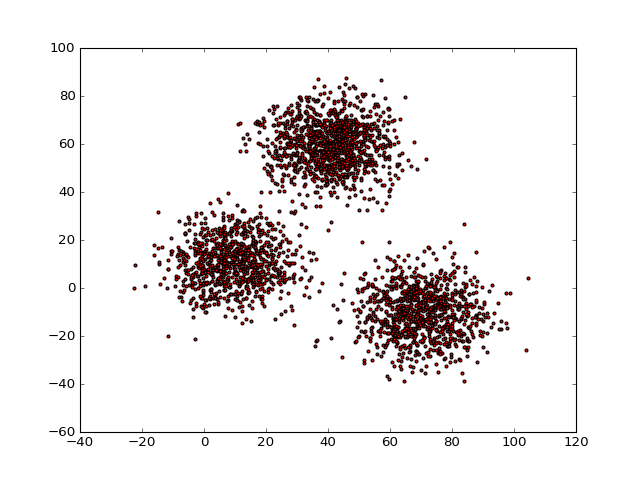

In [24]:
f1 = data['V1'].values
f2 = data['V2'].values
%matplotlib notebook
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='red', s=7)
plt.show()

#### Function to calculate Euclidean Distance between two vectors 'a' and 'b'

In [25]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

#### We intialize three cluster centers randomly to start the k-means algorithm

In [26]:
# Number of clusters
k = 3
# X coordinates of random centroids
x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(x, y)), dtype=np.float32)
print(C)

[[  6.  78.]
 [  0.  36.]
 [ 65.  54.]]


#### This is how the data look when the algorithm get intialized.

<IPython.core.display.Javascript object>


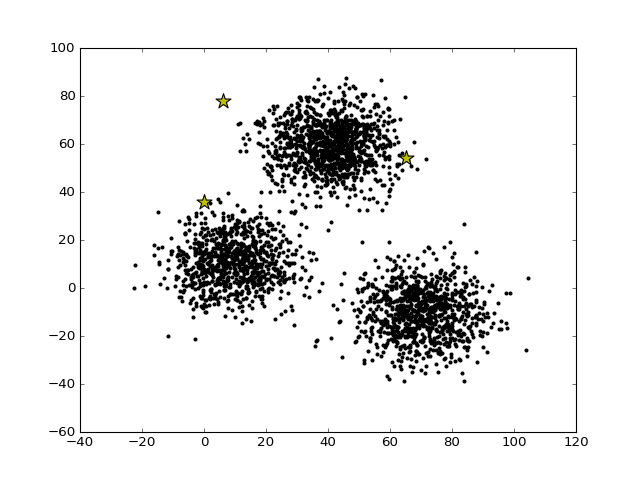

In [27]:
# Plotting along with the Centroids
%matplotlib notebook
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(x, y, marker='*', s=200, c='y')
plt.show()

## K-means algorithm 

K-means algorithm iteratively performs this two steps: 

1. The first step assigns clusters to points by assigning them to the cluster with nearest centriod. 
2. The second step calculates the new mean from the points belonging to the cluster. 

We repeat these two steps till convergence.

<IPython.core.display.Javascript object>


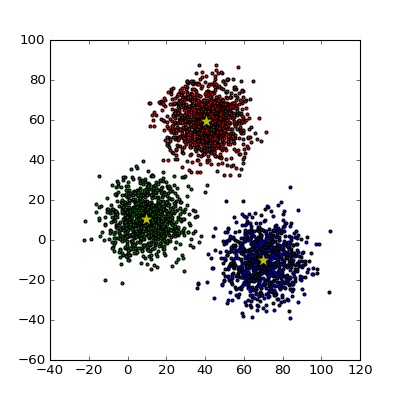

error: 48.3447
error: 32.4673
error: 5.45258
error: 0.0


In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
while error >= 0.1:
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # Assigning each value to its closest cluster
  
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    #print(k)
    ax.clear()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='y')
    fig.canvas.draw()
    time.sleep(5)
    print("error:",error)
    #plt.show()


**Exercise** change the number of cluster  and check how the plot is changing